In [279]:
import pandas as pd
import numpy as np

In [280]:
# I cleaned the data up to be able to use tabs as the seperator.
data = pd.read_csv('./seeds_dataset.txt', sep='\t', index_col=None, header=None)

# Set column headers
column_headers = ['Area', 'Perimeter', 'Compactness',
                  'Length of Kernel', 'Width of kernel',
                  'Asymmetry Coefficient', 'Length of Kernel Groove', 'Class (1, 2, 3)']

data.columns = column_headers

#pd.set_option('display.max_rows', 10)
data

,Area,Perimeter,Compactness,Length of Kernel,Width of kernel,Asymmetry Coefficient,Length of Kernel Groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [281]:
from sklearn.model_selection import train_test_split

X, y = data.iloc[:, 1:].values, data.iloc[:, 7].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                          stratify=y,
                                                          random_state = 0)

In [282]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

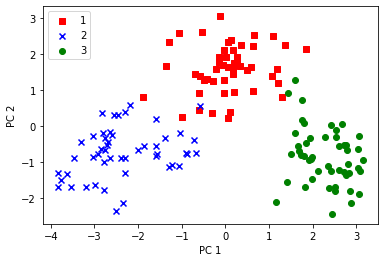

In [283]:
import matplotlib.pyplot as plt
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train == l, 0],
              X_train_pca[y_train == l, 1],
              c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')

In [284]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([5.86763483e-01, 2.51654884e-01, 9.53100350e-02, 5.78365264e-02,
       5.83634110e-03, 2.03475332e-03, 5.63977382e-04])

In [285]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

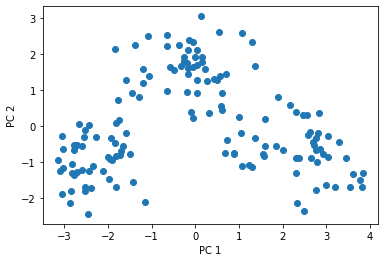

In [286]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [287]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

  # setup marker gen and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], 
                  y=X[y == cl, 1],
                  alpha=0.6, 
                  c=cmap(idx),
                  edgecolor='black',
                  marker=markers[idx], 
                  label=cl)

In [288]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


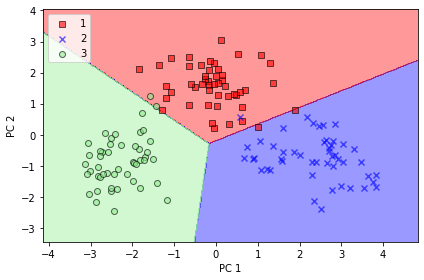

In [289]:
#Plot PCA training data
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


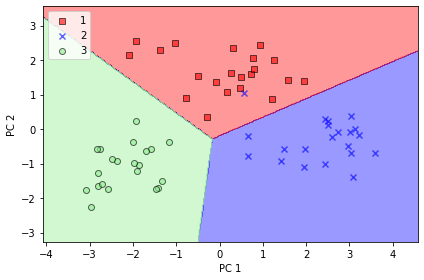

In [290]:
#Plot PCA test data
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [291]:
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([5.86763483e-01, 2.51654884e-01, 9.53100350e-02, 5.78365264e-02,
       5.83634110e-03, 2.03475332e-03, 5.63977382e-04])

In [292]:
"""
I couldn't get the LDA to work. For some reason, changing the n_components still left only one element in each list, whereas
 when I tested it on the Ch05_Dimensional_reduction example, setting n_components = 2 would make it so each list had two elements.
 Having only one element broke the plot_decision_regions function, so this would not work.
"""

"\nI couldn't get the LDA to work. For some reason, changing the n_components still left only one element in each list, whereas\n when I tested it on the Ch05_Dimensional_reduction example, setting n_components = 2 would make it so each list had two elements.\n Having only one element broke the plot_decision_regions function, so this would not work.\n"

In [293]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_train_lda

array([[-3.78377673e-03],
       [ 1.11435191e+15],
       [-3.78377673e-03],
       [-3.78377673e-03],
       [-3.78377673e-03],
       [-3.78377673e-03],
       [-1.11435191e+15],
       [-3.78377673e-03],
       [ 1.11435191e+15],
       [-1.11435191e+15],
       [-3.78377673e-03],
       [-3.78377673e-03],
       [-1.11435191e+15],
       [-1.11435191e+15],
       [-1.11435191e+15],
       [-1.11435191e+15],
       [ 1.11435191e+15],
       [-3.78377673e-03],
       [ 1.11435191e+15],
       [-1.11435191e+15],
       [ 1.11435191e+15],
       [-1.11435191e+15],
       [-3.78377673e-03],
       [-3.78377673e-03],
       [-3.78377673e-03],
       [-1.11435191e+15],
       [-1.11435191e+15],
       [-1.11435191e+15],
       [ 1.11435191e+15],
       [-3.78377673e-03],
       [ 1.11435191e+15],
       [-3.78377673e-03],
       [-3.78377673e-03],
       [ 1.11435191e+15],
       [-1.11435191e+15],
       [-3.78377673e-03],
       [-3.78377673e-03],
       [-1.11435191e+15],
       [-3.7

In [294]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

#LDA Train data
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\fagge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
#LDA Test data
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

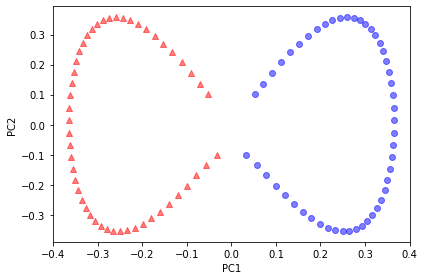

In [ ]:

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()